# Introduction

This notebook introduces the PyKMI package and how to use this to collect the synoptic observations from KMI.

pyKMI serves as a wrapper around the WFS service that KMI offers to download the synoptic measurements.

See the following links for the metadata of the service:

* https://opendata.meteo.be/geonetwork/srv/eng/catalog.search;jsessionid=A7FEA3AF21132DE8B1DA8A2CD1746597#/metadata/RMI_DATASET_SYNOP
* https://opendata.meteo.be/documentation/?dataset=synop


# Initialize the package

First load the modules we will use

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd   
from openkmi.synoptic import Synop

c:\programdata\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\programdata\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\programdata\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\timfr\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Then initialize the package

In [2]:
kmi = Synop()

# Inspect the available stations

You can use pyKMI to get an overview of all stations where you can collect the data for

In [3]:
df_stations = kmi.get_stations()
print(f'There are {df_stations.shape[0]} stations available')

There are 22 stations available


In [4]:
df_stations

,code,the_geom,altitude,name,date_begin,date_end
0,6490,POINT (50.478615 5.909864),482.0,SPA (AERODROME),1952-01-01T00:00:00,NaN
1,6476,POINT (50.038875 5.403753),557.0,SAINT-HUBERT,1952-01-01T00:00:00,NaN
2,6414,POINT (50.90398 3.121692),24.8,BEITEM,2003-08-01T07:00:00,NaN
3,6418,POINT (51.347375 3.201846),12.1,ZEEBRUGGE,2005-12-01T00:00:00,NaN
4,6438,POINT (51.324802 4.363798),4.0,STABROEK,2012-08-05T00:00:00,NaN
5,6446,POINT (50.796862 4.357871),100.6,UCCLE-UKKEL,2001-08-23T00:00:00,2003-12-09T08:00:00
6,6447,POINT (50.796862 4.357871),100.6,UCCLE-UKKEL,2003-12-01T00:00:00,NaN
7,6477,POINT (50.915458 5.450296),39.3,DIEPENBEEK,2004-06-29T00:00:00,NaN
8,6478,POINT (50.645282 5.458738),178.0,BIERSET,1952-01-01T00:00:00,NaN
9,6439,POINT (51.075125 4.524608),8.3,SINT-KATELIJNE-WAVER,2007-10-22T00:00:00,NaN


# Inspect the available parameters

Let's see what data is in the wfs and what data we can use to filter upon.

In [5]:
kmi.get_parameters()

{'code': 'int',
 'timestamp': 'dateTime',
 'precip_quantity': 'decimal',
 'precip_range': 'decimal',
 'temp': 'decimal',
 'temp_min': 'decimal',
 'temp_max': 'decimal',
 'temp_grass_min': 'decimal',
 'wind_speed': 'decimal',
 'wind_speed_unit': 'int',
 'wind_direction': 'decimal',
 'wind_peak_speed': 'decimal',
 'humidity_relative': 'decimal',
 'weather_current': 'int',
 'pressure': 'decimal',
 'pressure_station_level': 'decimal',
 'sun_duration_24hours': 'decimal',
 'short_wave_from_sky_24hours': 'decimal',
 'cloudiness': 'decimal'}

# Download data

For downloading the data you need to provide at least the station code. Optional parameters are:
* **start_date and end_date**: These are used to limit the requested data
* **parameter_list**: List of parameters to download

## Example: Wind speed

To get the wind speed for the station at Stabroek from 2021 - now you can use the following command:

In [6]:
df_r = kmi.get_data('6438', start_date='2021-01-01T00:00:00', parameter_list=['wind_speed'])

In [7]:
df_r.head()

,wind_speed
timestamp,
2021-01-01 00:00:00+00:00,1.000
2021-01-01 01:00:00+00:00,0.000
2021-01-01 02:00:00+00:00,1.000
2021-01-01 03:00:00+00:00,1.000
2021-01-01 04:00:00+00:00,1.388


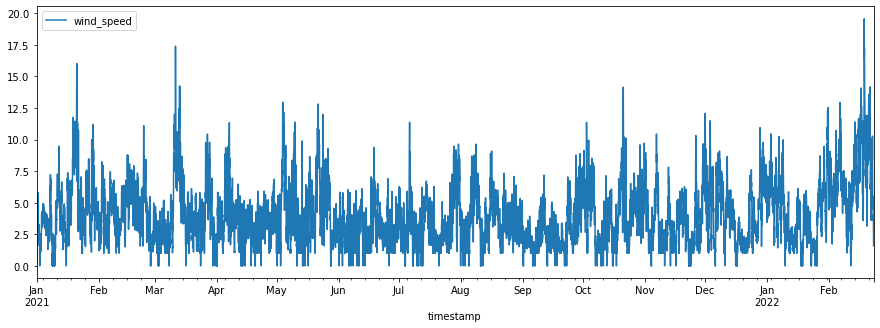

In [8]:
fix, ax = plt.subplots(figsize=(15,5))
df_r.plot(ax=ax)

## Example: Precipitation

Precipitation is not available on an hourly timescale. According to the metadata are 2 different precipitation ranges available:

* Value at 0600UT: sum of precipitation between 1750-0550UT (12h)
* Value at 1200UT: sum of precipitation between 0550-1150UT (6h)
* Value at 1800UT: sum of precipitation between 0550-1750UT (12h)
* Value at 0000UT: sum of precipitation between 1750-2350UT (6h)

We first request both the precipitation quanitity and the precipitation range for the station of Ukkel

In [9]:
df_r = kmi.get_data('6447', start_date='2020-01-01T00:00:00', end_date= '2022-01-01T00:00:00', parameter_list=['precip_quantity', 'precip_range'])

In [10]:
df_r.dropna().head(10)

,precip_quantity,precip_range
timestamp,,
2020-01-01 00:00:00+00:00,0.0,1.0
2020-01-01 06:00:00+00:00,0.0,2.0
2020-01-01 12:00:00+00:00,0.0,1.0
2020-01-01 18:00:00+00:00,0.0,2.0
2020-01-02 00:00:00+00:00,0.0,1.0
2020-01-02 06:00:00+00:00,0.0,2.0
2020-01-02 12:00:00+00:00,0.0,1.0
2020-01-02 18:00:00+00:00,0.1,2.0
2020-01-03 00:00:00+00:00,0.0,1.0


This list contains a mix of data measured over a 6h period (precip_range=1) and over a 12h period (precip_range=2).
To get cumulative volumes we want to filter out only those measured over the 12h period

In [11]:
df_r = df_r.loc[df_r['precip_range'] == 2, 'precip_quantity']

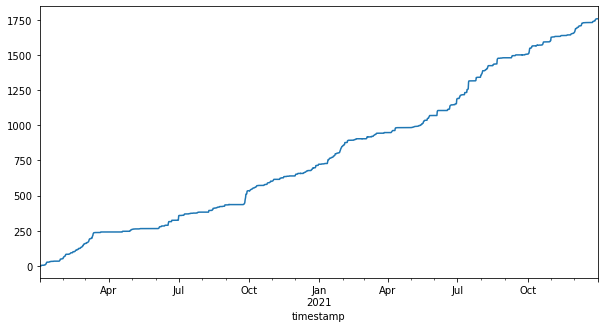

In [12]:
fix, ax = plt.subplots(figsize=(10,5))
df_r.cumsum().plot(ax=ax)

In [13]:
df_r.groupby(df_r.index.year).sum()

timestamp
2020     723.1
2021    1035.6
Name: precip_quantity, dtype: float64